## Polynomial Regression and Bias-Variance Trade Off

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

Text(0, 0.5, 'Y')

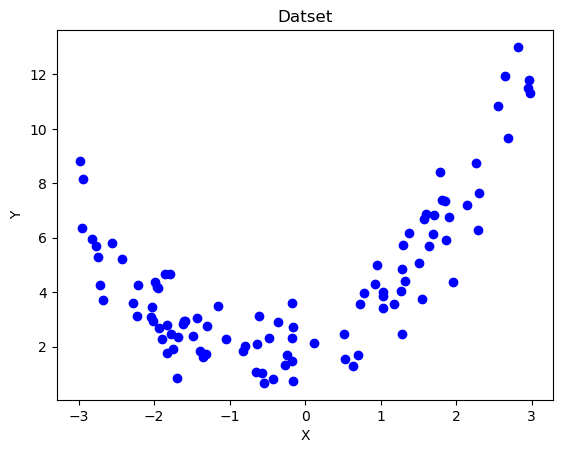

In [5]:
np.random.seed(54)
X = 6*np.random.rand(100,1)- 3
y = 0.8*X**2 + 0.9*X + 2 + np.random.randn(100,1)

plt.scatter(X, y, color='Blue')
plt.title("Datset")
plt.xlabel("X")
plt.ylabel("Y")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Beta", lr.coef_)
print("intercept: ", lr.intercept_)

Beta [[0.69255604]]
intercept:  [4.52291489]


In [9]:
y_predict = lr.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)
print("RMSE: ", rmse)
print("R2 : ", r2) #only captured 41% of variance which is not good

RMSE:  2.3563137008458073
R2 :  0.41718575401462


Text(0, 0.5, 'Y')

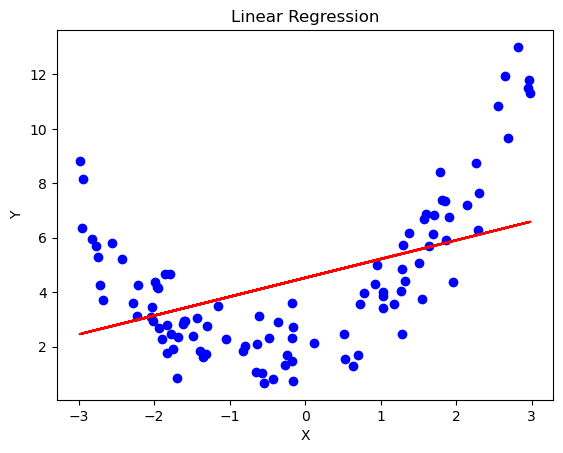

In [14]:
plt.scatter(X, y, color='Blue')
plt.plot(X, lr.predict(X), color='red')
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")

## Creating Polynomial Features

In [17]:
pol_tfm = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = pol_tfm.fit_transform(X)
poly_features.shape

(100, 2)

In [19]:
X[0] # single

array([-0.4789022])

In [20]:
poly_features[0] # 2 columns

array([-0.4789022 ,  0.22934731])

### Model Training

In [22]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=54)
lrp = LinearRegression()
lrp.fit(X_train, y_train)
print("Poly Beta", lrp.coef_)
print("Poly intercept: ", lrp.intercept_)

Poly Beta [[0.87609787 0.84623229]]
Poly intercept:  [1.92540845]


### Model Evaluation

In [23]:
y_predict = lrp.predict(X_test)
msep = mean_squared_error(y_test, y_predict)
rmsep = np.sqrt(msep)
r2p = r2_score(y_test, y_predict)
print("RMSE: ", rmsep)
print("R2 : ", r2p) # captured almost 87% variance

RMSE:  1.1049482986734123
R2 :  0.8718413697606255


Text(0, 0.5, 'Y')

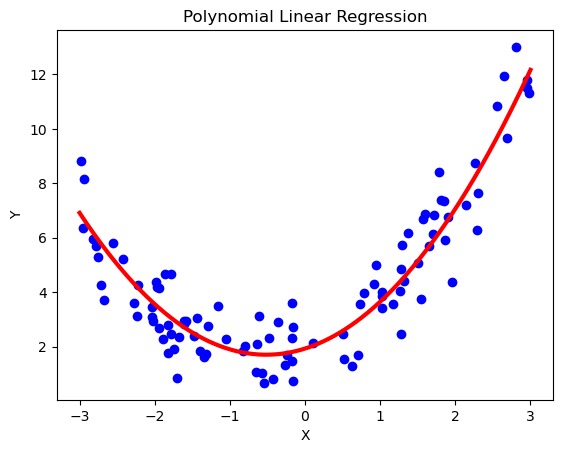

In [26]:
plt.scatter(X, y, color='Blue')
X_new = np.linspace(-3,3,500).reshape(500,1)
poly_X_new = pol_tfm.transform(X_new)
y_new = lrp.predict(poly_X_new)
plt.plot(X_new,y_new, color='red', linewidth=3)
plt.title("Polynomial Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")

## Bias Variance Trade Off

### Over Fitted Model

In [27]:
df = pd.read_csv("datasets/advertising4D.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [29]:
X2 = df.drop('sales', axis=1)
y2 = df['sales']

In [32]:
pol_tfm.fit(X2)
poly_4d = pol_tfm.transform(X2)
print(poly_4d, poly_4d.shape)

[[ 230.1    37.8    69.2  ... 1428.84 2615.76 4788.64]
 [  44.5    39.3    45.1  ... 1544.49 1772.43 2034.01]
 [  17.2    45.9    69.3  ... 2106.81 3180.87 4802.49]
 ...
 [ 177.      9.3     6.4  ...   86.49   59.52   40.96]
 [ 283.6    42.     66.2  ... 1764.   2780.4  4382.44]
 [ 232.1     8.6     8.7  ...   73.96   74.82   75.69]] (200, 9)


In [34]:
X2.iloc[0,:]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [35]:
poly_4d[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(poly_4d, y, test_size=0.2, random_state=54)
lrp4 = LinearRegression()
lrp4.fit(X_train, y_train)
print("Poly Beta", lrp4.coef_)
print("Poly intercept: ", lrp4.intercept_)

Poly Beta [ 5.45417727e-02  1.94824457e-02  1.03435154e-02 -1.18459276e-04
  1.11189977e-03 -5.60767895e-05  1.71315991e-04 -3.26429330e-05
  7.03414270e-06]
Poly intercept:  4.895450491586825


In [38]:
y_predict4 = lrp4.predict(X_test)
test_residuals = y_test - y_predict4
msep4 = mean_squared_error(y_test, y_predict4)
rmsep4 = np.sqrt(msep4)
r2p4 = r2_score(y_test, y_predict4)
print("RMSE: ", rmsep4)
print("R2 : ", r2p4)

RMSE:  0.47720008564502836
R2 :  0.9912759260667955
